In [128]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [129]:
data_directory="helmet classify"

In [130]:
for img_cls in os.listdir(data_directory):
    for im in os.listdir(os.path.join(data_directory,img_cls)):
        img_path=os.path.join(data_directory,img_cls,im)
        print(img_path)
        break
        img=cv2.imread(img_path)

helmet classify\not weared\arrow_down.png
helmet classify\weared\image (1).jpeg


In [131]:
data=tf.keras.utils.image_dataset_from_directory(data_directory)


Found 152 files belonging to 2 classes.


In [132]:
data_item=data.as_numpy_iterator()

In [143]:
dataimg=data_item.next()

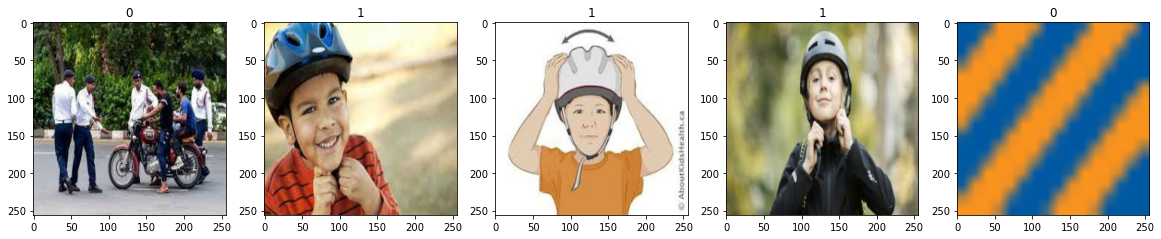

In [144]:
fig,ax=plt.subplots(ncols=5,figsize=(20,20))
for i,ig in enumerate(dataimg[0][:5]):
    ax[i].imshow(ig.astype(int))
    ax[i].title.set_text(dataimg[1][i])

In [148]:
data=data.map(lambda x,y:(x/255,y))

In [149]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)

In [150]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [151]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [47]:
model = Sequential([
Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
MaxPooling2D(),
Conv2D(32, (3,3), 1, activation='relu'),
MaxPooling2D(),
Conv2D(16, (3,3), 1, activation='relu'),
MaxPooling2D(),
Flatten(),
Dense(256, activation='relu'),
Dense(1, activation='sigmoid') 
])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [50]:
model.compile('adam',
              loss="BinaryCrossentropy", metrics=['accuracy'])

In [51]:
model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
3/3 [==============================] - 4s 895ms/step - loss: 0.8732 - accuracy: 0.4062 - val_loss: 0.7158 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 2s 751ms/step - loss: 0.6711 - accuracy: 0.5521 - val_loss: 0.6475 - val_accuracy: 0.6562
Epoch 3/20
3/3 [==============================] - 2s 722ms/step - loss: 0.6340 - accuracy: 0.6771 - val_loss: 0.6100 - val_accuracy: 0.6875
Epoch 4/20
3/3 [==============================] - 2s 735ms/step - loss: 0.5613 - accuracy: 0.7396 - val_loss: 0.5084 - val_accuracy: 0.7812
Epoch 5/20
3/3 [==============================] - 2s 728ms/step - loss: 0.5511 - accuracy: 0.7188 - val_loss: 0.4826 - val_accuracy: 0.7812
Epoch 6/20
3/3 [==============================] - 2s 744ms/step - loss: 0.5085 - accuracy: 0.7812 - val_loss: 0.4771 - val_accuracy: 0.7500
Epoch 7/20
3/3 [==============================] - 2s 722ms/step - loss: 0.4761 - accuracy: 0.7917 - val_loss: 0.3960 - val_accuracy: 0.8438
Epoch 8/20
3/3 [====

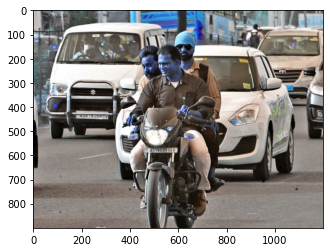

In [82]:
test_img=cv2.imread("1657136906875.jpeg")
plt.imshow(test_img)
plt.show()

In [83]:
resized_image=tf.image.resize(test_img,(256,256))

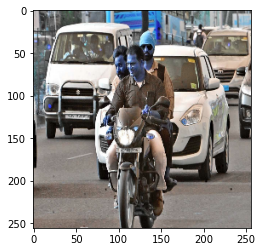

In [87]:
rezized_image.shape.as_list()
plt.imshow(resized_image.numpy().astype(int))

In [85]:
pred=model.predict(np.expand_dims(resized_image/255,0))
pred

1/1 [==============================] - 0s 31ms/step


array([[5.376638e-06]], dtype=float32)

In [86]:
if pred>0.50:
    print("wearing helmet")
else:
    print("not wearing helmet")

not wearing helmet
